# Import Library

Ada beberapa library yang perlu dipakai. `pandas` untuk memuat data ke DataFrame atau struktur data. 

`sklearn.model_selection import train_test_split` digunakan untuk membagi data menjadi data train dan data test. 

`sklearn.ensemble import RandomForestClassifier` digunakan untuk membuat dan melatih model Random Forest. 

`sklearn.metrics import accuracy_score, classification_report, confusion_matrix` digunakan untuk mengukur akurasi, laporan klasifikasi, dan confusion matrix. 

`matplotlib.pyplot as plt` dipakai untuk membuat plot untuk confusion matrix. 

`seaborn as sns` dipakai visualiasi data dari **matplotlib** untuk membuat plot yang lebih menarik.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

Memuat dataset dari **iris.scv**

In [38]:
data = pd.read_csv("iris.csv")
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Data Split
Membagi data menjadi dua bagian, yaitu data train dan data test. Var `X` berisi semua atribut kecuali kolom **Species**. Var `y` berisi label kelas **Species**. setelah memisahkan `X` dan `y`, kemudian membagi dataset menjadi data train dan data test.

In [39]:
X = data.drop('Species', axis=1)
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and Training Model using Random Forest
Fungsi `RandomForestClassifier` digunakan untuk membuat model yang berjumlah 100 decision trees. 

Kemudian `rf_model.fit(X_train, y_train)` dipakai untuk melakukan training pada model yang sudah dibuat menggunakan method **fit**.


In [40]:
rf_model = RandomForestClassifier(n_estimators=24, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=24, random_state=42)

# Confusion Matrix, Prediction, and Accuracy
`y_pred = rf_model.predict(X_test)` melakukan prediksi pada data test **X_test** menggunakan model **rf_model**, kemudian disimpan pada var `y_pred`.

`accuracy = accuracy_score(y_test, y_pred)` digunakan untuk menghitung akurasi model dengan membandingkan prediksi `y_pred` dengan label asli dari data test `y_test`. Akurasi ini digunakan untuk mengukur sejauh mana model berhasil memprediksi kelas dengan benar.

`classification_report(y_test, y_pred)` dipakai untuk mencetak laporan klasifikasi yang berisi precision, recall, F1-score dan support untuk setiap kelas.

`confusion_matrix(y_test, y_pred)` digunakan untuk mencetak confusion matrix yang menunjukan seberapa baik model memprediksi kelas sebenarnya.




In [41]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 1.00

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Data Visual

Visualisasi data menggunakan library **matplotlib plt** dan **seaborn sns** yang bertujuan memberikan visualisasi data yang lebih menarik untuk dilihat. Bisa dilihat bahwa prediksi menggunakan **Random Forest** pada dataset **Iris** menunjukan tingkat akurasi **1.00** dan antara prediksi dari var `y_pred` dan data `X_test` sesuai.


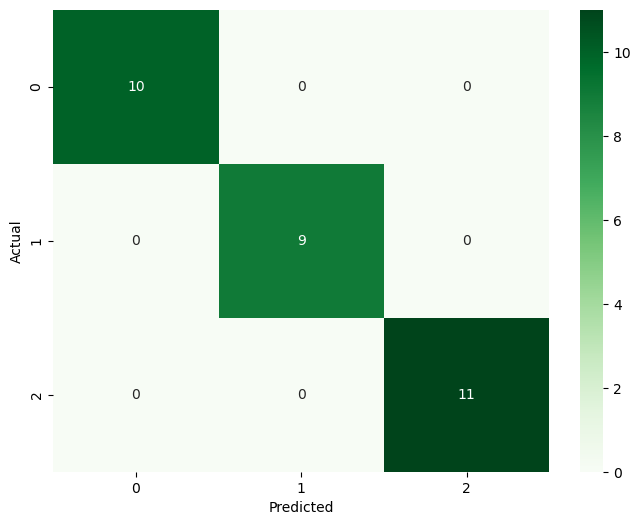

In [42]:
# Contoh plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()